C:\Users\user\anaconda3\envs\tf_gpu_ver3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


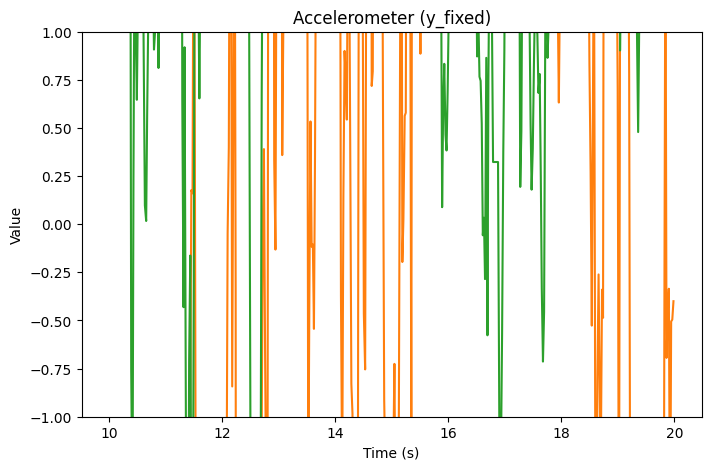

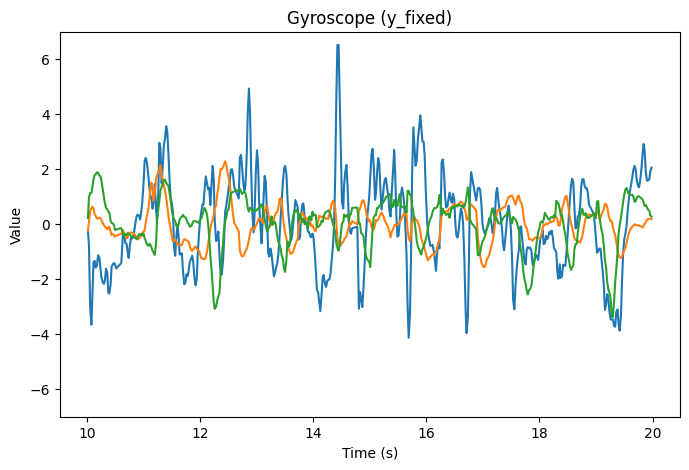

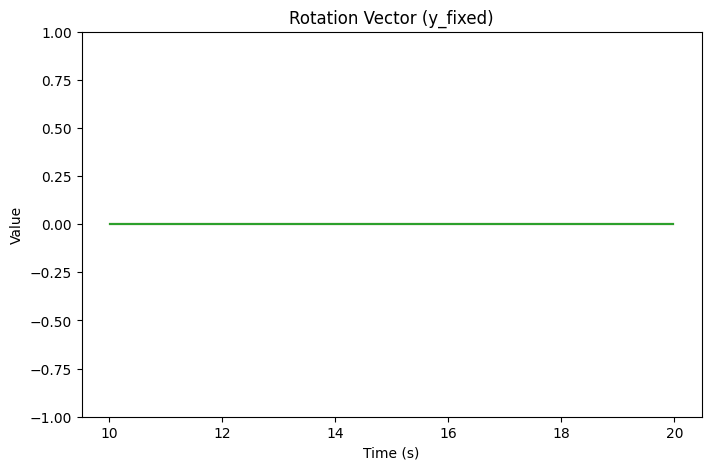

C:\Users\user\anaconda3\envs\tf_gpu_ver3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\tf_gpu_ver3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\tf_gpu_ver3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


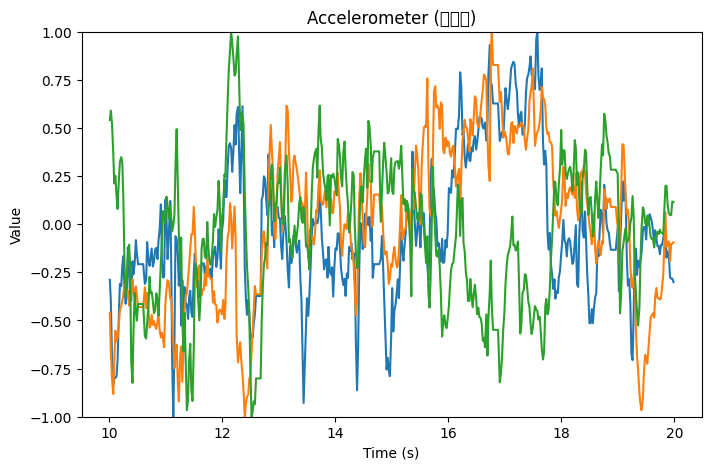

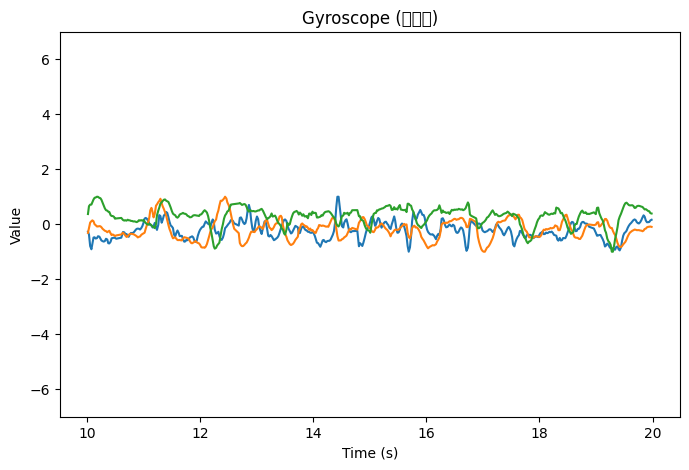

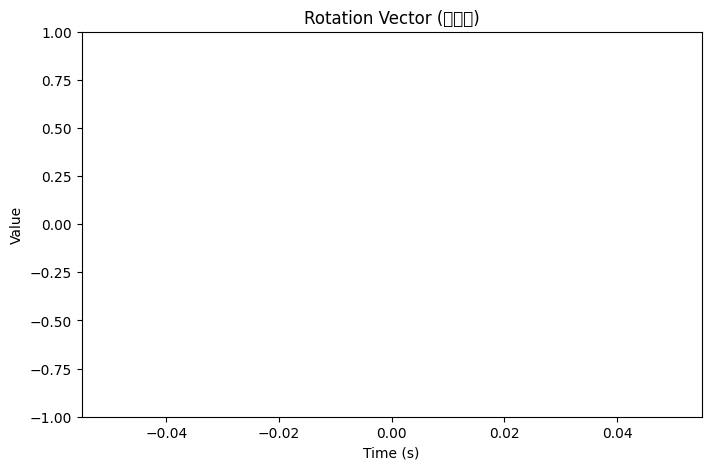

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 CSV 파일
file_path = '../Data/Train_Data/1_RawDataset/10/Right/10_Brushing_2025_1_1_14_38_33_SensorData.csv'
example_df = pd.read_csv(file_path)

# 시간 범위 설정 (초)
start_time = 10
end_time   = 20
example_df_filtered = example_df[(example_df['Time'] >= start_time) & (example_df['Time'] <= end_time)]

# Column 리스트
acc_cols    = ['AccX', 'AccY', 'AccZ']
gyro_cols   = ['GyroX', 'GyroY', 'GyroZ']
rotvec_cols = ['RotVecX', 'RotVecY', 'RotVecZ']

# 시각화
def plot_sensor_axes(df, time_col, axes_cols, title, y_limits=None):
    plt.figure(figsize=(8, 5))
    for axis in axes_cols:
        plt.plot(df[time_col], df[axis], label=axis)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    # y_limits가 주어지면 범위 고정
    if y_limits is not None:
        plt.ylim(y_limits)
    plt.show()

# 정규화 함수
def normalize_minus1_to_1(col):
    min_v, max_v = col.min(), col.max()
    return 2 * (col - min_v) / (max_v - min_v) - 1

# 정규화 Column 추가
for cols in (acc_cols, gyro_cols, rotvec_cols):
    for c in cols:
        example_df_filtered[f'{c}_norm'] = normalize_minus1_to_1(example_df_filtered[c])

# 정규화 된 데이터 (y축을 -1~1로 고정)
acc_norm  = [c + '_norm' for c in acc_cols]
gyro_norm = [c + '_norm' for c in gyro_cols]
rot_norm  = [c + '_norm' for c in rotvec_cols]

# Raw 센서 시각화 (Accel, Gyro, RotVec)
plot_sensor_axes(example_df_filtered, 'Time', acc_cols, 'Accelerometer (y_fixed)', y_limits=(-1, 1))
plot_sensor_axes(example_df_filtered, 'Time', gyro_cols, 'Gyroscope (y_fixed)', y_limits=(-7, 7))
plot_sensor_axes(example_df_filtered, 'Time', rotvec_cols, 'Rotation Vector (y_fixed)', y_limits=(-1, 1))

plot_sensor_axes(example_df_filtered, 'Time', acc_norm,  'Accelerometer (정규화)', y_limits=(-1, 1))
plot_sensor_axes(example_df_filtered, 'Time', gyro_norm, 'Gyroscope (정규화)',    y_limits=(-7, 7))
plot_sensor_axes(example_df_filtered, 'Time', rot_norm,  'Rotation Vector (정규화)', y_limits=(-1, 1))